In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
train_file = pd.read_csv('Train.csv')

In [3]:
#Finding NaN values in the dataset
train_nan = train_file[train_file.isna().any(axis=1)] 

In [4]:
#looking to fill NaN values in travel_with with 'Alone'
train_nan[['travel_with','total_female','total_male']] 

,travel_with,total_female,total_male
24,NaN,0.0,1.0
81,NaN,0.0,1.0
94,NaN,0.0,1.0
115,NaN,0.0,1.0
121,NaN,1.0,0.0
...,...,...,...
18455,NaN,1.0,0.0
18476,NaN,0.0,1.0
18485,NaN,0.0,1.0
18486,NaN,1.0,0.0


In [5]:
#Filling all null travel with cells with 'Alone'
train_file['travel_with'].fillna('Alone', inplace=True) 

In [6]:
#Dropping incompatable empty value
train_file.drop(train_file.index[316], inplace=True) 

In [7]:
#Dropping all null female values
train_file= train_file.dropna() 

In [8]:
#Replacing all yes/no with 1/0 respectively
train_file.replace(['Yes', 'No'], [1, 0], inplace=True) 

In [9]:
#making total packages per tour column
train_file['total_packages'] = train_file['package_transport_int'] + train_file['package_accomodation'] + \
train_file['package_food'] + train_file['package_transport_tz'] + train_file['package_sightseeing'] + \
+ train_file['package_guided_tour'] + train_file['package_insurance']

In [10]:
#making total people per tour column
train_file['total_people'] = train_file['total_female'] + train_file['total_male']

In [11]:
#makign total days column
train_file['total_days'] = train_file['night_mainland'] + train_file['night_zanzibar']

In [12]:
#Finding outliers in total people
total_people = train_file['total_people'].unique()
sorted_total_people = np.sort(total_people)

In [13]:
#Number of occurences for amount of people on the trip
people_counts = train_file['total_people'].value_counts()

In [14]:
#remove parties > 50
num_people = train_file[train_file['total_people'] > 50].index
train_file.drop(num_people , inplace=True)

In [15]:
#remove outliers for mainland? DISPLOT 
#sns.displot(train_file['night_mainland'])

In [16]:
#Finding outliers in mainland nights(discuss)
mainland_nights = train_file['night_mainland'].unique() 
sorted_mainland_nights = np.sort(mainland_nights)

In [17]:
#remove outliers for zanzibar? DISPLOT
#sns.displot(train_file['night_zanzibar'])

In [18]:
#Finding outliers in zanzibar nights(discuss)
zanibar_nights = train_file['night_zanzibar'].unique()
sorted_zanzibar_nights = np.sort(zanibar_nights)

In [19]:
#All countries into a list
#all_countries = train_file.country.unique().tolist()

In [20]:
#Getting countries where their occurence is less than 10
low_country_count = train_file['country'].value_counts().to_frame()
low_country_count = low_country_count[low_country_count['country'] < 10].index.tolist()

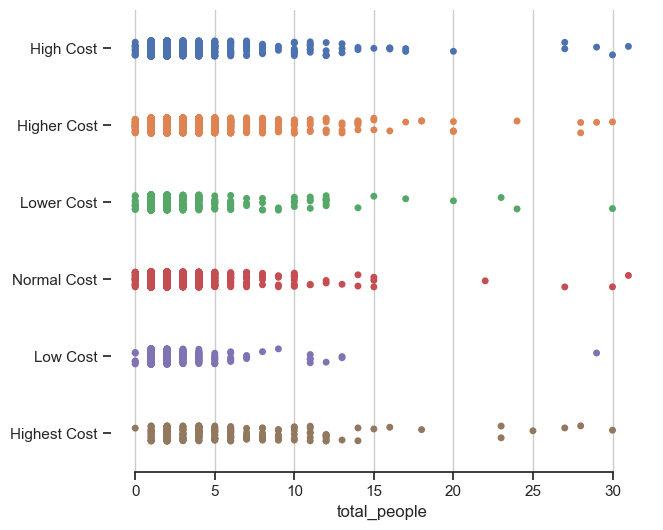

In [21]:
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Add in points to show each observation
sns.stripplot(x=train_file.total_people, y=train_file.cost_category)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [22]:
#filtering out low countries from countries
#high_country_count = [b for b in all_countries if all(a not in b for a in low_country_count)]

In [23]:
#making a continent column
europe = ['ITALY', 'UNITED KINGDOM', 'FRANCE', 'SWIZERLAND', 'SPAIN', 'DENMARK', 'BELGIUM', 'NETHERLANDS', 'NORWAY',
         'GERMANY','RUSSIA', 'GREECE','POLAND','AUSTRIA','CZECH REPUBLIC', 'IRELAND','SWEDEN', 'FINLAND','LUXEMBOURG', 'ROMANIA', 
         'PORTUGAL', 'SCOTLAND','SLOVAKIA','UKRAIN', 'HUNGARY','TURKEY']
north_america = ['UNITED STATES OF AMERICA', 'CANADA',]
latin_america = ['BRAZIL', 'ARGENTINA', 'URUGUAY','MEXICO', ]
asia = ['INDIA', 'CHINA', 'JAPAN', 'MALAYSIA', 'KOREA', 'THAILAND', 'SINGAPORE', 'PAKISTAN', 'TAIWAN', 'PHILIPINES',]
middle_east = ['LEBANON', 'ISRAEL', 'UNITED ARAB EMIRATES', 'QATAR', 'OMAN', 'UAE', 'SAUD ARABIA',]
oceania = ['AUSTRALIA', 'NEW ZEALAND',]
africa = ['RWANDA','NIGERIA', 'ZAMBIA', 'ZIMBABWE', 'SOUTH AFRICA', 'KENYA', 'DRC', 'UGANDA', 'CONGO', 'BURUNDI', 'NAMIBIA',
         'SUDAN', 'MALAWI','EGYPT', 'SRI LANKA','BOTSWANA', 'COMORO', 'ETHIOPIA','SWAZILAND',
 'MOZAMBIQUE', 'MAURITIUS']
other = ['CHILE', 'SERBIA', 'BAHRAIN', 'COLOMBIA', 'VIETNAM', 'MALT', 'KUWAIT', 'INDONESIA','GHANA', 'TRINIDAD TOBACCO',
         'CROATIA','BULGARIA','MADAGASCAR','CAMEROON','ICELAND','LATVIA','LITHUANIA','ALGERIA','MORROCO','BERMUDA','SLOVENIA',
         'SOMALI','YEMEN','VENEZUELA','ANGOLA','SEYCHELLES','NEPAL','TANZANIA','SENEGAL','JAMAICA','GAMBIA','PERU','IRAN',
         'LESOTHO','COSTARICA','GEORGIA','BOSNIA','DOMINICA','CAMBODIA','BURGARIA','AFGHANISTAN','ECUADO','PAPUA NEW GUINEA','ARMENIA',
         'CYPRUS','MACEDONIA','IVORY COAST','MONECASQUE','BARBADOS','MONTENEGRO','DJIBOUT','TUNISIA','LIBERIA','BANGLADESH','ERITREA',
         'NIGER','ESTONIA','CAPE VERDE','JORDAN']

conditions = [train_file['country'].isin(europe), 
        train_file['country'].isin(north_america), train_file['country'].isin(latin_america),
        train_file['country'].isin(asia), train_file['country'].isin(middle_east), 
        train_file['country'].isin(oceania), train_file['country'].isin(africa), 
         train_file['country'].isin(other)]

values = ['EUROPE', 'NORTH AMERICA', 'LATIN AMERICA', 'ASIA', 'MIDDLE EAST', 'OCEANIA', 'AFRICA', 'OTHER']
train_file['continent'] = np.select(conditions, values)

In [24]:
#Replacing cost categories with representative numerical values
train_file.replace({'Lower Cost' : 1, 
                    'Low Cost' : 2, 
                    'Normal Cost' : 3, 
                    'High Cost' : 4, 
                    'Higher Cost' : 5, 
                    'Highest Cost' : 6}, inplace=True)

In [25]:
#getting the correlations of the entire training table
training_correlations = train_file.corr()

In [26]:
#getting the correlations of the cost category
training_corr_series = training_correlations['cost_category']

In [27]:
#getting correlations over 0.5
pos_cost_correlations = training_correlations[training_correlations['cost_category'] > 0.5]['cost_category']

In [28]:
#Counting/normalizing cost categories across continents
cont_vs_cost = pd.crosstab(train_file.continent, train_file.cost_category, normalize='columns')

C:\Users\Steve\AppData\Local\Temp\ipykernel_44108\98713339.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  continent_graph.set_xticklabels(continent_graph.get_xticklabels(), rotation=30)


[Text(-1.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

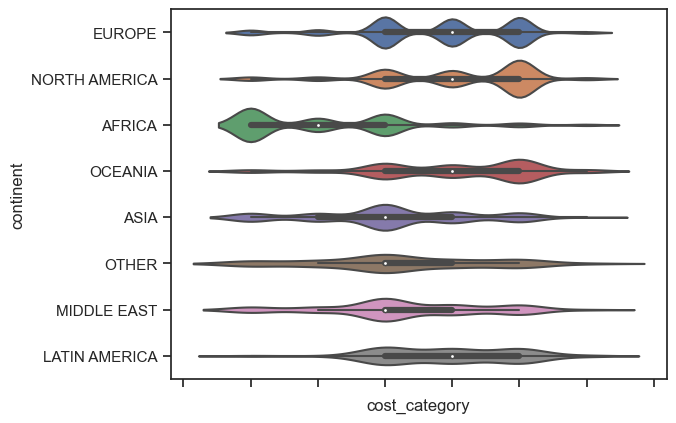

In [29]:
continent_graph = sns.violinplot(y=train_file.continent, x=train_file.cost_category)
continent_graph.set_xticklabels(continent_graph.get_xticklabels(), rotation=30)

In [30]:
#getting mean cost_category across continents
cont_cost_mean = train_file.groupby('continent', as_index=False).cost_category.mean()

In [31]:
#descriptive stats based on continent
descriptive_cont = train_file.groupby('continent').cost_category.describe()

In [32]:
#correlations on attributes over 0.5 grouped by continent
cont_pos_corr = train_file.groupby('continent')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
                                'total_packages', 'cost_category']].corr()['cost_category']

In [33]:
#Counting/normalizing cost categories across age groups
age_vs_cost = pd.crosstab(train_file.age_group, train_file.cost_category, normalize='columns')

C:\Users\Steve\AppData\Local\Temp\ipykernel_44108\864305166.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  age_graph.set_xticklabels(age_graph.get_xticklabels(), rotation=30)


[Text(-1.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

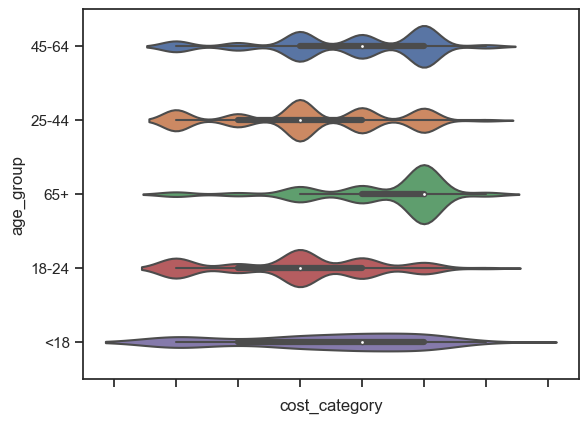

In [34]:
age_graph = sns.violinplot(y=train_file.age_group, x=train_file.cost_category)
age_graph.set_xticklabels(age_graph.get_xticklabels(), rotation=30)

In [35]:
#getting mean cost_category across ages
age_cost_mean = train_file.groupby('age_group', as_index=False).cost_category.mean()

In [36]:
#descriptive stats based on age groups
descriptive_age = train_file.groupby('age_group').cost_category.describe()

In [37]:
#correlations on attributes over 0.5 grouped by age groups
age_pos_corr = train_file.groupby('age_group')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
                                'total_packages', 'cost_category']].corr()['cost_category']

In [38]:
#Counting/normalizing cost categories across travel group type
travelers_vs_cost = pd.crosstab(train_file.travel_with, train_file.cost_category, normalize='columns')

C:\Users\Steve\AppData\Local\Temp\ipykernel_44108\2205187727.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  travelers_graph.set_xticklabels(travelers_graph.get_xticklabels(), rotation=30)


[Text(-1.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

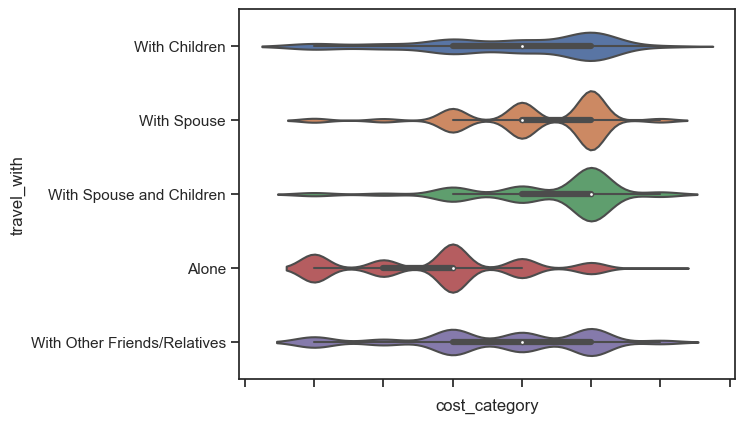

In [39]:
travelers_graph = sns.violinplot(y=train_file.travel_with, x=train_file.cost_category)
travelers_graph.set_xticklabels(travelers_graph.get_xticklabels(), rotation=30)

In [40]:
#getting mean cost_category across travel group type
travelers_cost_mean = train_file.groupby('travel_with', as_index=False).cost_category.mean()

In [41]:
#descriptive stats based on travel group type
descriptive_travelers = train_file.groupby('travel_with').cost_category.describe()

In [42]:
#correlations on attributes over 0.5 grouped by travel group type
travelers_pos_corr = train_file.groupby('travel_with')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
                                'total_packages', 'cost_category']].corr()['cost_category']

In [43]:
#Counting/normalizing cost categories across travel purpose
purpose_vs_cost = pd.crosstab(train_file.purpose, train_file.cost_category, normalize='columns')

C:\Users\Steve\AppData\Local\Temp\ipykernel_44108\777517664.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  purpose_graph.set_xticklabels(purpose_graph.get_xticklabels(), rotation=30)


[Text(-1.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

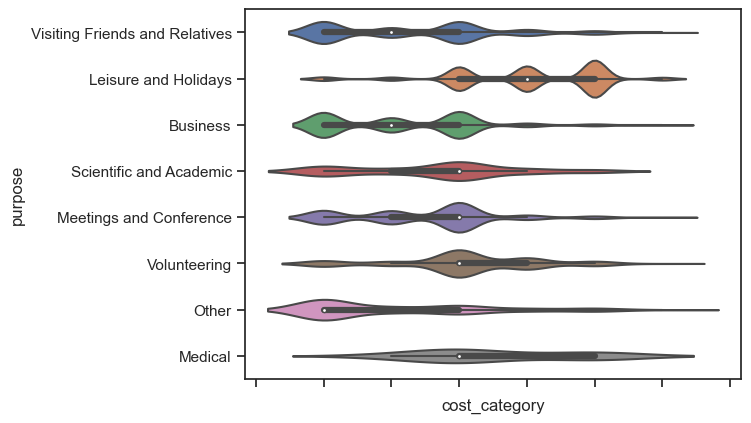

In [44]:
purpose_graph = sns.violinplot(y=train_file.purpose, x=train_file.cost_category)
purpose_graph.set_xticklabels(purpose_graph.get_xticklabels(), rotation=30)

In [45]:
#getting mean cost_category across purpose types
purpose_cost_mean = train_file.groupby('purpose', as_index=False).cost_category.mean()
purpose_cost_mean

,purpose,cost_category
0,Business,2.211580
1,Leisure and Holidays,4.016601
2,Medical,3.555556
3,Meetings and Conference,2.517827
4,Other,2.067692
5,Scientific and Academic,2.656566
6,Visiting Friends and Relatives,2.363715
7,Volunteering,3.093822


In [46]:
#descriptive stats based on purpose type
descriptive_purpose = train_file.groupby('purpose').cost_category.describe()
descriptive_purpose

,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
Business,2297.0,2.211580,1.068061,1.0,1.0,2.0,3.0,6.0
Leisure and Holidays,11746.0,4.016601,1.109415,1.0,3.0,4.0,5.0,6.0
Medical,9.0,3.555556,1.130388,2.0,3.0,3.0,5.0,5.0
Meetings and Conference,1178.0,2.517827,1.049386,1.0,2.0,3.0,3.0,6.0
Other,325.0,2.067692,1.312935,1.0,1.0,1.0,3.0,6.0
Scientific and Academic,198.0,2.656566,1.172109,1.0,2.0,3.0,3.0,5.0
Visiting Friends and Relatives,2304.0,2.363715,1.213473,1.0,1.0,2.0,3.0,6.0
Volunteering,437.0,3.093822,1.037323,1.0,3.0,3.0,4.0,6.0


In [47]:
#correlations on attributes over 0.5 grouped by purpose type
purpose_pos_corr = train_file.groupby('purpose')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
                                'total_packages', 'cost_category']].corr()['cost_category']
purpose_pos_corr

purpose                                              
Business                        package_transport_int    0.234991
                                package_accomodation     0.278837
                                package_food             0.238776
                                package_transport_tz     0.211611
                                total_packages           0.281739
                                cost_category            1.000000
Leisure and Holidays            package_transport_int    0.389839
                                package_accomodation     0.469435
                                package_food             0.431832
                                package_transport_tz     0.399781
                                total_packages           0.490685
                                cost_category            1.000000
Medical                         package_transport_int   -0.027864
                                package_accomodation     0.582816
                      

In [48]:
#Counting/normalizing cost categories across main activities
mainact_vs_cost = pd.crosstab(train_file.main_activity, train_file.cost_category, normalize='columns')

In [49]:
train_file['main_activity'].replace('Widlife Tourism', 'Wildlife Tourism', inplace=True)

C:\Users\Steve\AppData\Local\Temp\ipykernel_44108\913962853.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  activity_graph.set_xticklabels(activity_graph.get_xticklabels(), rotation=30)


[Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, ''),
 Text(8.0, 0, ''),
 Text(10.0, 0, '')]

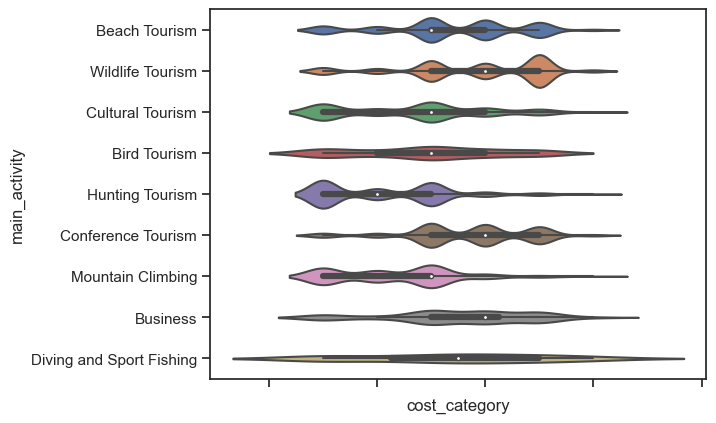

In [50]:
activity_graph = sns.violinplot(y=train_file.main_activity, x=train_file.cost_category)
activity_graph.set_xticklabels(activity_graph.get_xticklabels(), rotation=30)

In [51]:
#getting mean cost_category across mainact types
mainact_cost_mean = train_file.groupby('main_activity', as_index=False).cost_category.mean()

In [52]:
#descriptive stats based on main act type
descriptive_mainact = train_file.groupby('main_activity').cost_category.describe()

In [53]:
#correlations on attributes over 0.5 grouped by main act type
mainact_pos_corr = train_file.groupby('main_activity')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
                                'total_packages', 'cost_category']].corr()['cost_category']

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
train_file.isnull().sum()


Tour_ID                  0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
first_trip_tz            0
cost_category            0
total_packages           0
total_people             0
total_days               0
continent                0
dtype: int64

In [55]:
X = train_file[['total_people','package_transport_int', 'package_accomodation','package_food', 'package_transport_tz',
'package_insurance','package_guided_tour','package_sightseeing']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature        VIF
0           total_people   1.564326
1  package_transport_int   3.088554
2   package_accomodation  13.973256
3           package_food  10.296668
4   package_transport_tz   6.446707
5      package_insurance   1.564070
6    package_guided_tour   4.171750
7    package_sightseeing   3.734385


In [56]:
train_file['food_accomodation_package'] = train_file['package_accomodation'] + train_file['package_food']

In [57]:
X = train_file[['total_people','package_transport_int', 'package_transport_tz',
'package_insurance','package_guided_tour','package_sightseeing', 'food_accomodation_package']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                     feature       VIF
0               total_people  1.558418
1      package_transport_int  3.011660
2       package_transport_tz  6.397659
3          package_insurance  1.561742
4        package_guided_tour  4.165951
5        package_sightseeing  3.729660
6  food_accomodation_package  8.710823


[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6')]

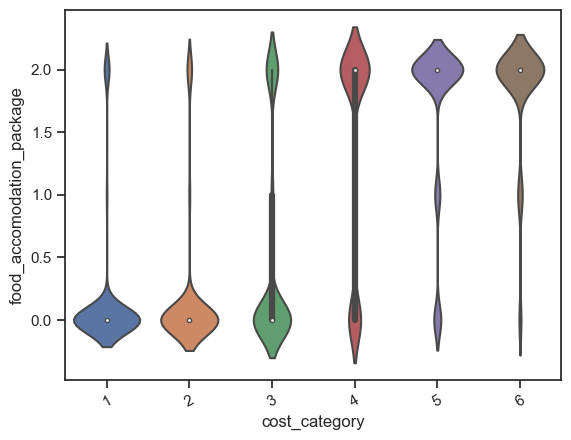

In [58]:
activity_graph = sns.violinplot(y=train_file.food_accomodation_package, x=train_file.cost_category)
activity_graph.set_xticklabels(activity_graph.get_xticklabels(), rotation=30)

In [59]:
train_file['total_packages'] = train_file['package_transport_int'] + train_file['package_accomodation'] + \
train_file['package_food'] + train_file['package_transport_tz'] + train_file['package_sightseeing'] + \
+ train_file['package_guided_tour'] + train_file['package_insurance']

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6')]

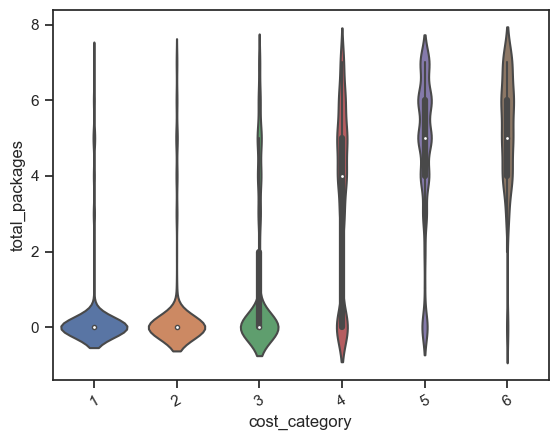

In [60]:
activity_graph = sns.violinplot(y=train_file.total_packages, x=train_file.cost_category)
activity_graph.set_xticklabels(activity_graph.get_xticklabels(), rotation=30)

In [68]:
train_file.columns

Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'first_trip_tz', 'cost_category', 'total_packages',
       'total_people', 'total_days', 'continent', 'food_accomodation_package'],
      dtype='object')

In [69]:
test_file = pd.read_csv('Test.csv')

In [65]:
test_file.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
0,tour_idynufedne,KOREA,25-44,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,Others,Independent,No,No,No,No,No,No,No,7,4,Yes
1,tour_id9r3y5moe,UNITED KINGDOM,45-64,With Children,1.0,1.0,Leisure and Holidays,Conference Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,7,0,Yes
2,tour_idf6itml6g,ITALY,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Beach Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,No,Yes,No,No,No,0,6,Yes
3,tour_id99u4znru,KENYA,25-44,Alone,0.0,1.0,Other,Beach Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,3,4,No
4,tour_idj4i9urbx,ZAMBIA,25-44,Alone,0.0,1.0,Business,Widlife Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,6,0,No


In [74]:
X = train_file.drop('cost_category', axis=1)
y = train_file['cost_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
train_file.dtypes

Tour_ID                       object
country                       object
age_group                     object
travel_with                   object
total_female                 float64
total_male                   float64
purpose                       object
main_activity                 object
info_source                   object
tour_arrangement              object
package_transport_int          int64
package_accomodation           int64
package_food                   int64
package_transport_tz           int64
package_sightseeing            int64
package_guided_tour            int64
package_insurance              int64
night_mainland                 int64
night_zanzibar                 int64
first_trip_tz                  int64
cost_category                  int64
total_packages                 int64
total_people                 float64
total_days                     int64
continent                     object
food_accomodation_package      int64
dtype: object

In [ ]:
train = train_file.drop([''])

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'tour_ido6d9ot0t'